# Data Preprocessing

### Importazione librerie

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib

### Caricamento file train.csv

In [2]:
file_path = "../../train.csv"
df = pd.read_csv(file_path)

### Controllo  e rimozione valori nulli e duplicati

In [3]:
# Valori mancanti per ciascuna colonna
missing_values_per_column = df.isnull().sum()
print("\nValori mancanti nel DataFrame per ciascuna colonna:")
print(missing_values_per_column)

# Totale dei valori mancanti in tutto il DataFrame
total_missing_values = missing_values_per_column.sum()
print(f"\nTotale dei valori mancanti nel DataFrame:\n{total_missing_values}")


Valori mancanti nel DataFrame per ciascuna colonna:
Year    0
S0      0
S1      0
S2      0
S3      0
       ..
S85     0
S86     0
S87     0
S88     0
S89     0
Length: 91, dtype: int64

Totale dei valori mancanti nel DataFrame:
0


In [4]:
print("\nDuplicati nel DataFrame:")
print(df.duplicated().sum())


Duplicati nel DataFrame:
52


In [5]:
clean_df = df.dropna() 
clean_df = df.drop_duplicates()

In [6]:
# Verifica rimozione valori nulli e duplicati
total_missing_values = missing_values_per_column.sum()
print(f"\nTotale dei valori mancanti nel DataFrame: {total_missing_values}")
print(f"\nDuplicati nel DataFrame: {clean_df.duplicated().sum()}")


Totale dei valori mancanti nel DataFrame: 0

Duplicati nel DataFrame: 0


In [7]:
clean_df.describe()

,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
count,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,...,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000
mean,1998.350143,43.379082,1.554115,8.644903,1.160495,-6.526296,-9.531860,-2.367001,-1.788615,3.712732,...,15.724619,-73.286196,41.487949,38.044051,0.334009,17.931321,-26.509443,4.488371,19.873068,1.309111
std,10.497821,6.066799,51.553786,35.236419,16.336976,22.842798,12.809783,14.531206,7.963667,10.554074,...,31.984394,174.926010,122.250505,94.579907,16.021250,114.048957,173.685614,13.286652,185.161556,22.113446
min,1956.000000,3.455260,-334.953220,-301.005060,-149.962040,-181.953370,-72.717370,-111.017810,-68.404510,-119.762620,...,-437.722030,-2984.920970,-1810.689190,-1848.702260,-272.289050,-2343.894110,-3819.933620,-233.456480,-7458.378150,-286.031200
25%,1994.000000,39.959190,-25.652865,-11.525215,-8.492365,-20.588825,-18.403075,-10.770910,-6.473035,-2.296255,...,-1.788015,-139.031800,-21.015265,-4.631245,-6.749575,-31.247580,-102.179795,-2.536405,-59.734690,-8.819860
50%,2002.000000,44.250210,8.654700,10.517340,-0.641620,-5.998880,-11.189760,-2.072920,-1.727880,3.821940,...,9.132190,-53.171760,28.675010,33.593230,0.818240,15.846730,-21.623440,3.145800,7.775050,0.062890
75%,2006.000000,47.823030,36.250215,29.795445,8.767810,7.740135,-2.448085,6.512805,2.913495,9.938115,...,26.208285,13.413625,89.185855,77.879375,8.451960,67.776985,51.887175,9.999690,85.829385,9.651235
max,2009.000000,61.970140,384.065730,318.868960,228.412110,262.068870,166.236890,160.815220,82.942190,92.792850,...,840.973380,4469.454870,3210.701700,1734.079690,199.121500,3662.065650,2833.608950,275.353660,7240.653730,600.766240


# Rimozione outlier e visualizzazione post rimozione

In [8]:
# Itera su ogni anno presente nel DataFrame
for year in clean_df['Year'].unique():
    # Filtra il DataFrame per l'anno corrente
    df_year = clean_df[clean_df['Year'] == year]
    
    # Calcola la mediana per ogni colonna
    median_values = df_year.median()
    
    # Calcola i limiti per individuare gli outlier per ogni colonna
    Q1 = df_year.quantile(0.25)
    Q3 = df_year.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Sostituisci gli outlier con la mediana per ogni colonna
    def replace_outliers(row):
        for col in df_year.columns[1:]:  # Escludi la colonna 'year'
            if row[col] < lower_limit[col] or row[col] > upper_limit[col]:
                row[col] = median_values[col]
        return row
    
    df_year = df_year.apply(replace_outliers, axis=1) # Sostituzione outlier con mediana
    
    # Sostituisci i dati nel DataFrame originale
    clean_df.loc[clean_df['Year'] == year] = df_year

In [9]:
file_path = "../outliers_data/df_outliers.csv"
df_outliers = pd.read_csv(file_path)

In [10]:
# Seleziona solo le colonne che iniziano con 'S'
colonne_s = [col for col in df.columns if col.startswith('S')]

# Lista per memorizzare i risultati
risultati_nuovi_outliers = []

# Ciclo attraverso ogni colonna 'S'
for col in colonne_s:
    # Calcola i quantili e l'IQR (Interquartile Range)
    q1 = clean_df[col].quantile(0.25)
    q3 = clean_df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calcola i baffi inferiori e superiori
    baffo_inferiore = q1 - 1.5 * iqr
    baffo_superiore = q3 + 1.5 * iqr
    
    # Trova gli outliers inferiori e superiori
    outliers_inferiori = clean_df[clean_df[col] < baffo_inferiore]
    outliers_superiori = clean_df[clean_df[col] > baffo_superiore]
    numero_outliers = len(outliers_inferiori) + len(outliers_superiori)
    
    # Calcola la percentuale di outliers
    percentuale_outliers = (numero_outliers / len(df)) * 100
    
    # Aggiungi i risultati alla lista
    risultati_nuovi_outliers.append({
        'Colonna': col,
        'Numero Outliers': numero_outliers,
        'Percentuale Outliers': f'{percentuale_outliers:.2f}%'
    })

# Converti la lista in un DataFrame
df_nuovi_outliers = pd.DataFrame(risultati_nuovi_outliers)

#print(df_nuovi_outliers)
 
# Unisci il DataFrame originale con il nuovo DataFrame sui risultati dopo la sostituzione
outliers_summary_df = df_outliers.merge(df_nuovi_outliers, on='Colonna')

# Rinomina le colonne per rimuovere '_x' e '_y'
outliers_summary_df = outliers_summary_df.rename(columns={
    'Numero Outliers_x': 'Numero Outliers',
    'Percentuale Outliers_x': 'Percentuale Outliers',
    'Numero Outliers_y': 'Numero nuovo Outliers',
    'Percentuale Outliers_y': 'Percentuale nuova Outliers'
})
 
# Visualizza la tabella finale
print(outliers_summary_df)

   Colonna  Numero Outliers Percentuale Outliers  Numero nuovo Outliers  \
0       S0             5306                2.10%                   1492   
1       S1             7313                2.90%                   2684   
2       S2             7484                2.97%                   2657   
3       S3            11229                4.45%                   4782   
4       S4             5224                2.07%                   1429   
..     ...              ...                  ...                    ...   
85     S85            16608                6.59%                   8073   
86     S86            15876                6.30%                   7731   
87     S87            14794                5.87%                   7548   
88     S88            19031                7.55%                   9973   
89     S89            19330                7.67%                  10960   

   Percentuale nuova Outliers  
0                       0.59%  
1                       1.06%  
2  

### Suddivisione del DataSet

In [11]:
X = clean_df.drop(columns=['Year'])  # Non la consideriamo per il modello
y = clean_df['Year'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Standardizzazione

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Salva il modello di scaling
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [13]:
training_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]
total_size = X.shape[0]

print(f"Dimensione del training set: {training_set_size} ({(training_set_size / total_size) * 100:.2f}% del dataset totale)")
print(f"Dimensione del test set: {test_set_size} ({(test_set_size / total_size) * 100:.2f}% del dataset totale)")

# print("\nDati di training normalizzati:")
# print(X_train_scaled)

Dimensione del training set: 201698 (80.00% del dataset totale)
Dimensione del test set: 50425 (20.00% del dataset totale)


### PCA

In [14]:
X_rf = clean_df.drop('Year', axis=1)
y_rf = clean_df['Year']

In [15]:
# Riduzione della dimensionalità con PCA
pca = PCA(n_components=0.95)  # Mantieni il 95% della varianza spiegata
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Numero di componenti principali: {pca.n_components_}")
print(f"Forma dei dati di training dopo PCA: {X_train_pca.shape}")
print(f"Forma dei dati di test dopo PCA: {X_test_pca.shape}") 

Numero di componenti principali: 76
Forma dei dati di training dopo PCA: (201698, 76)
Forma dei dati di test dopo PCA: (50425, 76)


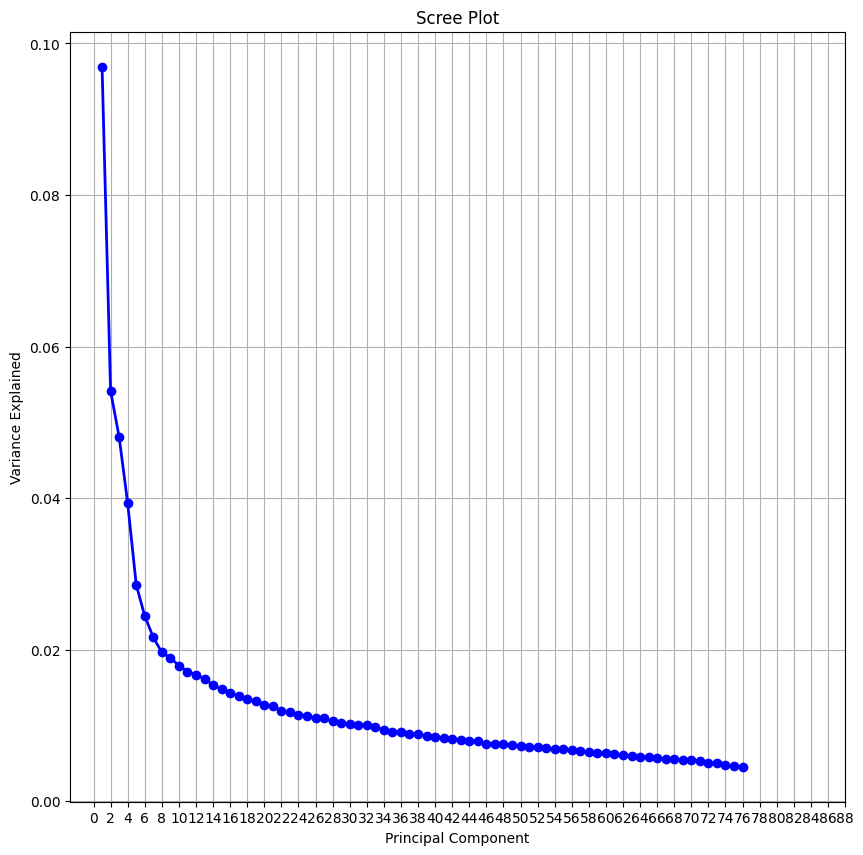

Explainer variance of each component: [0.09692469 0.05412895 0.04806441 0.03933065 0.02857302 0.02443236
 0.02161112 0.01961974 0.01890284 0.01788984 0.017096   0.01669412
 0.01615147 0.01531919 0.01478145 0.01432042 0.01386291 0.01341789
 0.01324431 0.01272169 0.0124973  0.01195174 0.01176963 0.01143497
 0.01126016 0.01094845 0.01091529 0.01052434 0.01033505 0.01021099
 0.01005563 0.01001322 0.00976837 0.00937    0.0091539  0.00906982
 0.00883007 0.00881955 0.00861228 0.00843029 0.0083641  0.00825738
 0.00809597 0.00790401 0.00788197 0.00758495 0.00756961 0.00750773
 0.00737644 0.00724875 0.00716583 0.00709692 0.00701649 0.00692097
 0.00688887 0.00669458 0.00663192 0.00653223 0.00640386 0.00632932
 0.0061705  0.00603308 0.00590975 0.00581946 0.00576287 0.00566026
 0.00557619 0.00552181 0.00541372 0.00540309 0.00525479 0.00506456
 0.00497037 0.00472363 0.00467908 0.0045433 ]
Variance total: 0.9530364539951103


In [16]:
#Scree Plot -> mostra la percentuale di variazione spiegata da ogni componente principale
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(range(0,90,2))
plt.ylabel('Variance Explained')
plt.show()
print("Explainer variance of each component:",pca.explained_variance_ratio_)
print("Variance total:", sum(pca.explained_variance_ratio_))

# Modeling

In [24]:
# Calcolo e stampe metriche di valutazione del modello
def valutazione_modello(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")
    print(f"R-squared: {r2}")
    return mse, mae, mape, r2

## Random Forest
Un ensemble di alberi decisionali, che predice in base alla media delle previsioni degli alberi individuali.

In [29]:
'''
# Definizione dei parametri per il tuning
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [80], 
    'min_samples_split': [82],
    'min_samples_leaf': [5] 
}

# Creazione del modello e GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)

# Migliori parametri trovati
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

# Predizione
y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Valutazione del modello
print("Random Forest Performance:")
valutazione_modello(y_test, y_pred_rf)
'''

In [1]:
# Set modello con migliori iperparametri
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=3,
)

# Fit su tutto il df scalato
rf.fit(X_train_pca, y_rf)

# Salvataggio del modello su disco
with open("rf_test.save", "wb") as file:
    pickle.dump(rf, file)

NameError: name 'RandomForestRegressor' is not defined

## LR (Linear Regression)

In [ ]:
# Creazione del modello di regressione lineare
lr = LinearRegression()

# Addestramento del modello
lr.fit(X_train, y_train)

# Predizione
y_pred_lr = lr.predict(X_test)

# Valutazione del modello
print("Risultati linear regression:")
valutazione_modello(y_test, y_pred_lr)

# Salvataggio del modello
joblib.dump(lr, 'linear_regression_model.pkl')


In [ ]:
# PCA
linear_regr = LinearRegression()
# Addestriamo modello sui dati di training
linear_regr.fit(X_train_pca, y_train)

# Predizioni sul set di test
y_pred = linear_regr.predict(X_test_pca)

# Valutazione del modello
print("Risultati linear regression con PCA:")
valutazione_modello(y_test, y_pred)

Risultati linear regression:
MSE (Mean Squared Error): 81.79
MAE (Mean Absolute Error): 6.70
MAPE (Mean Absolute Percentage Error): 0.00
R-squared: 0.25


In [ ]:
# standard scalar
linear_regr = LinearRegression()
# Addestriamo modello sui dati di training
linear_regr.fit(X_train_scaled, y_train)

# Predizioni sul set di test
y_pred = linear_regr.predict(X_test_scaled)

# Valutazione del modello
print("Risultati linear regression con Standard scalar:")
valutazione_modello(y_test, y_pred)

Linear Regression Performance:
MSE: 79.05891891246776
MAE: 6.508626639496495
MAPE: 0.3266294896617657%
R-squared: 0.27463890823264536


['linear_regression_model.pkl']

## SVM
Un modello che separa le classi trovando un iperpiano ottimale in uno spazio ad alta dimensione.

## SVR

In [ ]:
# Definizione dei parametri per il tuning
param_grid_svr = {
    'C': [0.1, 0.4, 0.8, 1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.3, 0.5, 0.7, 0.9, 'scale'],
    'epsilon' : [0.01, 0.2, 0.5, 1.0, 0.1] 
}

# Creazione del modello e GridSearchCV
svr = SVR()
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train_scaled, y_train)

# Migliori parametri trovati
print(f"Migliori parametri per SVR: {grid_svr.best_params_}")

# Predizione
y_pred_svr = grid_svr.best_estimator_.predict(X_test_scaled)

# Valutazione del modello
print("Risultati SVR:")
valutazione_modello(y_test, y_pred_svr)


## KNN
Un modello basato sulla distanza, che classifica un punto in base alle classi più comuni tra i suoi vicini più vicini.

In [ ]:
# Definizione dei parametri per il tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Creazione del modello e GridSearchCV
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train_scaled, y_train)

# Migliori parametri trovati
print(f"Migliori parametri per KNN: {grid_knn.best_params_}")

# Predizione
y_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled)

# Valutazione del modello
print("Risultati KNN:")
valutazione_modello(y_test, y_pred_knn)


## KNR

Modelli Supervised basati su Reti Neurali Feed-Forward: In questa sezione, utilizzerai reti neurali semplici, come il Multi-Layer Perceptron (MLP), per predire l'anno della canzone. Le reti neurali sono particolarmente utili quando si lavora con dati complessi e non lineari.

Modelli Deep per Tabular Data: Questa parte include l'uso di modelli deep learning specificamente progettati per dati tabulari, come:

TabNet: Un modello di deep learning progettato per lavorare direttamente con dati tabulari.
TabTransformer: Un modello che combina architetture di transformer con reti neurali per gestire dati tabulari.